## Task 3: Predictive Analysis - WIP
Consider the problem of predicting for each incident (considering the whole dataset for this task) the label which is a **binary variable** that indicates if in the incident there have been at least a killed person or not.


In [74]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)



In [75]:
# Import the datasets

# Gun incidents data
df_incidents_cleaned = pd.read_hdf('../ds/cleaned/reduced_for_clustering.h5', key = 'df')

# Visualize data table
df_incidents_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131618 entries, 0 to 134578
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       131618 non-null  datetime64[ns]
 1   state                      131618 non-null  object        
 2   city_or_county             131618 non-null  object        
 3   latitude                   131618 non-null  float64       
 4   longitude                  131618 non-null  float64       
 5   congressional_district     131618 non-null  int64         
 6   participant_age_group1     131618 non-null  category      
 7   participant_gender1        131618 non-null  category      
 8   avg_age_participants       131618 non-null  int64         
 9   n_participants_child       131618 non-null  int64         
 10  n_participants_teen        131618 non-null  int64         
 11  n_females                  131618 non-null  int64   

In [76]:

df_incidents_dt = df_incidents_cleaned.copy()
#df_incidents_dt['n_participant_adult'] = (df_incidents_dt['n_participants'] - (df_incidents_dt['n_participants_child'] + df_incidents_dt['n_participants_teen'])).astype('int')
columns_to_drop_dt = ['longitude',
                   'latitude', 
                   'congressional_district',
                   'participant_age_group1',
                   'participant_gender1',
                   'incident_characteristics1',
                   'city_or_county',
                   'date',
                   'n_injured',
                   'party',
                   'candidatevotes',
                   'totalvotes'

                   ]

df_incidents_dt.drop(columns_to_drop_dt, axis = 1, inplace = True)
df_incidents_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131618 entries, 0 to 134578
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   state                   131618 non-null  object  
 1   avg_age_participants    131618 non-null  int64   
 2   n_participants_child    131618 non-null  int64   
 3   n_participants_teen     131618 non-null  int64   
 4   n_females               131618 non-null  int64   
 5   n_killed                131618 non-null  int64   
 6   n_arrested              131618 non-null  int64   
 7   n_unharmed              131618 non-null  int64   
 8   povertyPercentage       131618 non-null  float64 
 9   ratio_killed            131618 non-null  float64 
 10  death_level             131618 non-null  category
 11  percentage_injured      131618 non-null  float64 
 12  unharmed_ratio          131618 non-null  float64 
 13  density_incident_state  131618 non-null  float64 
 14  male

False    90540
True     41078
Name: isKilled, dtype: int64

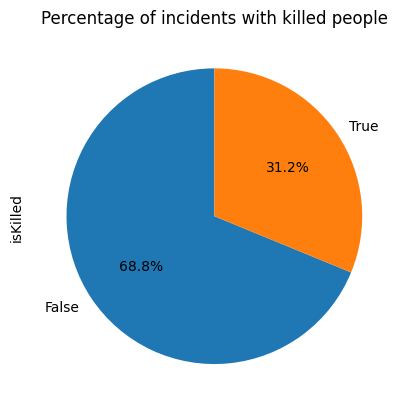

In [99]:
df_incidents_dt['isKilled'] = df_incidents_dt['n_killed'] > 0
df_incidents_dt['isKilled'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title = 'Percentage of incidents with killed people')


### Decision Tree

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.discriminant_analysis import StandardScaler

import pandas as pd

# Assuming df_incidents_cleaned is your original DataFrame

# Select 100 samples where isKilled is True
killed_samples = df_incidents_dt[df_incidents_dt['isKilled'] == True].sample(n=100, random_state=42)

# Select 100 samples where isKilled is False
not_killed_samples = df_incidents_dt[df_incidents_dt['isKilled'] == False].sample(n=100, random_state=42)

# Concatenate the balanced samples into a new DataFrame
balanced_df = pd.concat([killed_samples, not_killed_samples])

# Shuffle the rows in the new DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced DataFrame
#print(balanced_df.head())  # You can replace this with your desired way of using the balanced dataset



target = balanced_df['isKilled']
df_dt = balanced_df.drop(['isKilled', 'n_killed'], axis = 1)
df_dt = pd.get_dummies(df_dt)
df_dt.info()

random_state = 42
test_size = 0.2
max_depth = 40
#X_train, X_test, y_train, y_test = train_test_split(df_dt, target, test_size=test_size, random_state=random_state)
train_set, test_set, train_label, test_label = train_test_split(df_dt, target, stratify =target, test_size=0.30)
train_set_cplumns = train_set.columns
#scaler = StandardScaler()
#train_set = scaler.fit_transform(train_set)
balanced_df['isKilled'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_age_participants     200 non-null    int64  
 1   n_participants_child     200 non-null    int64  
 2   n_participants_teen      200 non-null    int64  
 3   n_females                200 non-null    int64  
 4   n_arrested               200 non-null    int64  
 5   n_unharmed               200 non-null    int64  
 6   povertyPercentage        200 non-null    float64
 7   ratio_killed             200 non-null    float64
 8   percentage_injured       200 non-null    float64
 9   unharmed_ratio           200 non-null    float64
 10  density_incident_state   200 non-null    float64
 11  males_to_females_ratio   200 non-null    float64
 12  state_Alabama            200 non-null    uint8  
 13  state_Alaska             200 non-null    uint8  
 14  state_Arkansas           2

True     100
False    100
Name: isKilled, dtype: int64

In [79]:
#define a decision tree and fit it
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                  max_depth=20, 
                                  min_samples_split=50, min_samples_leaf=20)
dt = dt.fit(train_set, train_label)

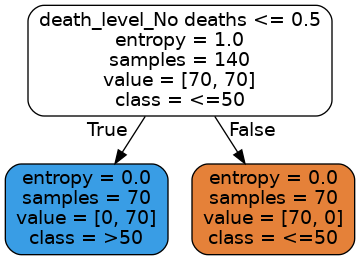

In [80]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set_cplumns),  
                         class_names=['<=50', '>50'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [81]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

In [82]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  1.0
Accuracy test set  1.0
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([70, 70]))


In [83]:
#metrics computed on the test set
from sklearn.metrics import classification_report
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['0', '1']))

In [84]:
report_scores(test_label, test_pred_dt)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# Neural Network

In [92]:
import tensorflow as tf
import numpy as np
#train_set, test_set, train_label, test_label

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 57)),
  tf.keras.layers.Dense(32, activation='relu'),  
  tf.keras.layers.Dense(1, activation='relu')
])



model.compile(optimizer='adamax',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [93]:
y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
x_train = np.reshape(train_set.values, (len(train_set), 1, len(train_set.columns)))
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20


1/1 [==============================] - 1s 1s/step - loss: 141.8788 - accuracy: 0.4821 - val_loss: 122.8072 - val_accuracy: 0.5714
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 129.2370 - accuracy: 0.4821 - val_loss: 111.6240 - val_accuracy: 0.5714
Epoch 3/20
1/1 [==============================] - 0s 134ms/step - loss: 117.5665 - accuracy: 0.4821 - val_loss: 101.3636 - val_accuracy: 0.5714
Epoch 4/20
1/1 [==============================] - 0s 142ms/step - loss: 106.7893 - accuracy: 0.4821 - val_loss: 91.8880 - val_accuracy: 0.5714
Epoch 5/20
1/1 [==============================] - 0s 109ms/step - loss: 96.8687 - accuracy: 0.4821 - val_loss: 83.1653 - val_accuracy: 0.5714
Epoch 6/20
1/1 [==============================] - 0s 150ms/step - loss: 87.7465 - accuracy: 0.4821 - val_loss: 75.1525 - val_accuracy: 0.5714
Epoch 7/20
1/1 [==============================] - 0s 132ms/step - loss: 79.3608 - accuracy: 0.4821 - val_loss: 67.7892 - val_accuracy: 0.5714
Epoch 8/20
1/1

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 57)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                1856      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1889 (7.38 KB)
Trainable params: 1889 (7.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


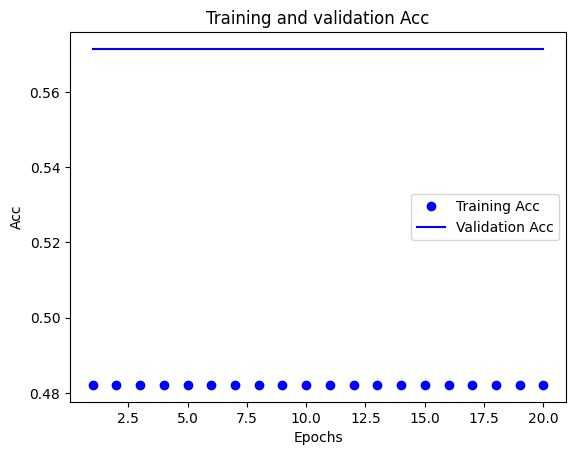

In [95]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [96]:
x_test = np.reshape(test_set.values, (len(test_set), 1, 57))
test_pred_nn = (model.predict(x_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 4ms/step


In [97]:
report_scores(test_label, test_pred_nn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.50      1.00      0.67        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



/home/luca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/luca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/luca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [98]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1, l2, l1_l2
from keras.optimizers import SGD, Adam
from keras.callbacks import  EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import loadtxt
from keras import backend as K
from sklearn.metrics import make_scorer
from elm import ELM

from matplotlib import pyplot as plt


def read_tr(file_path, test_size=0.15, random_state=42):
    """Load training data and compute the validation split.
    Parameters:
        file_path: string containing the complete path where the training dataset is stored
        test_size: float between 0.0 and 1.0 defining the amount of dataset to be kept for the validation set
        random_state: integer that allows the replicability of the analysis
    """
    train = loadtxt(file_path, delimiter=',', usecols=range(1, 14), dtype=np.float64)

    # Esclude la prima colonna e le ultime tre colonne (target)
    x = train[:, :-3]
    y = train[:, -3:]  # Le ultime tre colonne rappresentano i target

    # Suddivide il dataset in set di addestramento e test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    return x_train, y_train, x_test, y_test


def read_ts(file: str = "./cup/ds/ML-CUP23-TS.csv"):
    """Load and return the 'blind test' dataset given its full path."""
    test = loadtxt(file, delimiter=',', usecols=range(1, 11), dtype=np.float64)

    return test


def euclidean_distance_loss(y_true, y_pred):
    """Compute the Euclidean distance, used in training and evaluation of the model."""
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))


def create_model(lmb=0.0001, lmb2=0.0001,
                 n_units=20,
                 n_layers=3,
                 init_mode='glorot_normal',
                 activation_fx='tanh',
                 regularizer=l1_l2):
    """This function returns a brand-new model every time is called, so it's useful for gridsearch.

    Args:
      lmb: lambda for the L1/L2 regularizer
      lmb2: if L1L2 is used, this is the lambda of the L2 regularizer, while the previous one of the L1
      n_units: number of units of the dense layers
      n_layers: number of dense layers to add to the neural network
      init_mode: initialization method to use for the layers. Default is 'glorot_normal' but any of those accepted
        by Keras can be used
      activation_fx: activation function for the hidden layers. Default is 'tanh' but any of those accepted by Keras
        can be used. The activation function for the output layer is predefined as linear and cannot be modified
      regularizer: regularizer applied to each dense layer.
    """
    model = Sequential()

    # Create hidden layers
    for i in range(n_layers):
        model.add(Dense(n_units,
                        kernel_initializer=init_mode,
                        activation=activation_fx,
                        kernel_regularizer=regularizer(lmb, lmb2)))

        # create output layer with 3 neurons for x, y, z
    model.add(Dense(3, activation='linear', kernel_initializer=init_mode))
    return model


def euclidean_distance_score(y_true, y_pred):
    """It retrieves the mean value of all the passed losses"""
    return np.mean(euclidean_distance_loss(y_true, y_pred))


scorer = make_scorer(euclidean_distance_score, greater_is_better=False)


def model_selection(x, y, epochs: int = 100):
    """Computed the gridsearch over some parameters and returns the best model."""
    # Evaluation list contains each tested model and relatives parameters into a dictionary
    evaluation = []
    learning_rate = np.arange(start=0.01, stop=0.4, step=0.01)
    learning_rate = [float(round(i, 4)) for i in list(learning_rate)]

    momentum = np.arange(start=0.9, stop=1, step=0.1)
    momentum = [float(round(i, 1)) for i in list(momentum)]

    lmb = np.arange(start=0.0001, stop=0.001, step=0.0001)
    lmb = [float(round(i, 5)) for i in list(lmb)]
    lmb2 = np.arange(start=0.0001, stop=0.001, step=0.0004)
    lmb2 = [float(round(i, 5)) for i in list(lmb)]

    total = len(learning_rate) * len(momentum) * len(lmb)
    print(f"Total {total} fits.")
    learning_rate = [0.02]
    momentum = [0.9]
    bs = 50

    for lr in learning_rate:
        for mom in [1]:
            for lm in lmb:
                for lm2 in lmb2:
                    # optimizer = SGD(learning_rate=lr, momentum=mom)
                    optimizer = Adam(learning_rate=lr)
                    model = create_model(lmb=lm, lmb2=lm2, regularizer=l1_l2)
                    model.compile(optimizer=optimizer, loss=euclidean_distance_loss)
                    history = model.fit(x, y, batch_size=bs, epochs=epochs, validation_split=0.3)

                    model_loss = [np.mean(history.history["val_loss"]), np.mean(history.history["loss"])]
                    metrics = dict(learning_rate=lr,
                                   momentum=mom,
                                   lmb=lm,
                                   lmb2=lm2,
                                   batch_size=bs,
                                   val_score=model_loss[0],
                                   train_score=model_loss[1])
                    evaluation.append(metrics)
                    print(f"Testing model→ Learning_rate: {lr}, momentum: {mom}, "
                          f"L2: {lm}, batch_size: {bs}, val_score: {model_loss[0]}")

    print("Evaluating best model...")
    best = 10000
    for mod in evaluation:
        if mod["val_score"] < best:
            best = mod["val_score"]
            bestm = mod

    print(f"Best model: {bestm}")

    return dict(learning_rate=bestm["learning_rate"],
                momentum=bestm["momentum"],
                lmb=bestm["lmb"],
                lmb2=bestm["lmb2"],
                epochs=epochs,
                batch_size=bestm["batch_size"],
                regularizer=l1_l2)


def predict(model, x_ts, x_its, y_its):
    # predict on internal test set
    y_ipred = model.predict(x_its)
    iloss = euclidean_distance_loss(y_its, y_ipred)

    # predict on blind test set
    y_pred = model.predict(x_ts)

    # Return predicted target on blind test set and losses on internal test set
    # y_pred is a matrix where each column represents predictions for one of the three target variables.
    # The function returns a list of arrays, one for each column.
    return [y_pred[:, i] for i in range(y_pred.shape[1])], K.eval(iloss)



def plot_learning_curve(history, start_epoch=1, **kwargs):
    lgd = ['Loss TR']
    plt.plot(range(start_epoch, kwargs['epochs']), history['loss'][start_epoch:])

    if "val_loss" in history:
        plt.plot(range(start_epoch, kwargs['epochs']), history['val_loss'][start_epoch:])
        lgd.append('Loss VL')

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f'Keras Learning Curve \n {kwargs}')
    plt.legend(lgd)

    # Check if predictions are available in the history
    if 'predictions' in history:
        predictions = history['predictions']

        # Plot predictions for each variable
        for i in range(predictions.shape[1]):
            plt.figure()
            plt.plot(range(start_epoch, kwargs['epochs']), predictions[:, i][start_epoch:])
            plt.xlabel("Epoch")
            plt.ylabel(f"Prediction Variable {i + 1}")
            plt.title(f'Keras Learning Curve \n {kwargs} - Prediction Variable {i + 1}')

    plt.show()





def extremelm():
    """Create and fit an extreme learning machine using the Moore-Penrose pseudo inverse as shown in the original
    aper."""
    file_path_tr = "./cup/ds/ML-CUP23-TR.csv"
    x_train, y_train, x_test, y_test = read_tr(file_path_tr)
    num_classes = 3
    num_hidden_units = 300

    # Create instance of our model
    model = ELM(
        num_input_nodes=10,
        num_hidden_units=num_hidden_units,
        num_out_units=num_classes,
        activation="sigmoid",
        loss="mse"
    )

    # Train
    model.fit(x_train, y_train, True)
    train_loss, train_acc = model.evaluate(x_train, y_train)
    print('train loss: %f' % train_loss)
    print('train acc: %f' % train_acc)

    # Validation
    val_loss, val_acc = model.evaluate(x_test, y_test)
    print('val loss: %f' % val_loss)
    print('val acc: %f' % val_acc)


extremelm()

ModuleNotFoundError: No module named 'elm'

In [ ]:
ms=False
print("keras start")
    # read training set
x, y, x_its, y_its = train_set, test_set, train_label, test_label
    # choose model selection or hand-given parameters
if ms:
    params = model_selection(x, y)
else:
        # Best model with Lasso/Ridge regulatization
        # params = dict(learning_rate=0.016, momentum=0.9, lmb=0.0005, epochs=1000, batch_size=50, regularizer=l2)
        # Best model with ElasticNet regularization
    params = dict(learning_rate=0.02, momentum=0.9, lmb=0.0005, lmb2=0.0005, epochs=5000, batch_size=50, regularizer=l1_l2)

    # Create and fit the model
    cb = EarlyStopping(monitor="val_loss", patience=10)
    model = create_model(lmb=params['lmb'], lmb2=params["lmb2"], regularizer=params["regularizer"])
    # model.compile(optimizer=SGD(learning_rate=params["learning_rate"], momentum=params["momentum"]))
    model.compile(optimizer=Adam(learning_rate=params["learning_rate"]))
    res = model.fit(x, y,
                    validation_split=0.3,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    callbacks=[cb],
                    verbose=1)

    tr_losses = res.history['loss']
    val_losses = res.history['val_loss']
    # Prediction for the three variables
    y_pred, ts_losses = predict(model=model, x_ts=read_ts(), x_its=x_its, y_its=y_its)

    print("TR Loss: ", tr_losses[-1])
    print("VL Loss: ", val_losses[-1])
    print("TS Loss: ", np.mean(ts_losses))

    # Extract predictions for each variable
    '''
    y_pred_x, y_pred_y, y_pred_z = y_pred

    print("Predictions for X: ", y_pred_x)
    print("Predictions for Y: ", y_pred_y)
    print("Predictions for Z: ", y_pred_z)
    '''
    print("keras end")
    params["epochs"] = len(tr_losses)
    plot_learning_curve(res.history, savefig=True, **params)